# Problem Set 3

                                                                                   Supun Randeniya

                                                                                   200543751

Question 1

In [86]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url,delimiter = '|') 

# Calculate mean age per occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean()

print(mean_age_by_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [87]:
# Calculate male ratio per occupation
male_ratio_by_occupation = users.groupby('occupation')['gender'].agg(lambda x: (x == 'M').sum() / len(x))

# Sort by male ratio in descending order
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)

print(male_ratio_by_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [32]:
# Calculate minimum and maximum ages per occupation
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print(min_max_age_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [33]:
# Calculate mean age per occupation and sex
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_by_occupation_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [34]:
# Calculate percentage of women and men per occupation
total_by_occupation_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
total_by_occupation = users.groupby('occupation').agg('count')
percentage_by_occupation_gender = (total_by_occupation_gender.div(total_by_occupation, level = "occupation") * 100).round(2)

print(percentage_by_occupation_gender)

                      age  gender  user_id  zip_code
occupation    gender                                
administrator F       NaN   45.57      NaN       NaN
              M       NaN   54.43      NaN       NaN
artist        F       NaN   46.43      NaN       NaN
              M       NaN   53.57      NaN       NaN
doctor        M       NaN  100.00      NaN       NaN
educator      F       NaN   27.37      NaN       NaN
              M       NaN   72.63      NaN       NaN
engineer      F       NaN    2.99      NaN       NaN
              M       NaN   97.01      NaN       NaN
entertainment F       NaN   11.11      NaN       NaN
              M       NaN   88.89      NaN       NaN
executive     F       NaN    9.38      NaN       NaN
              M       NaN   90.62      NaN       NaN
healthcare    F       NaN   68.75      NaN       NaN
              M       NaN   31.25      NaN       NaN
homemaker     F       NaN   85.71      NaN       NaN
              M       NaN   14.29      NaN    

Question 2

In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(url)

In [85]:
# Select only the "Goal" column
goals = euro12["Goals"]

print(goals.head())

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64


In [84]:
# Get the number of unique teams in the "Team" column
num_teams = euro12["Team"].nunique()

print("Number of teams: ", num_teams)

Number of teams:  16


In [83]:
# Get the number of columns in the Data
num_cols = euro12.shape[1]

print("Number of columns: ", num_cols)

Number of columns:  35


In [82]:
# Select only the "Team", "Yellow Cards", and "Red Cards" columns
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]

print(discipline.head())

             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0


In [81]:
# Sort the teams by "Red Cards" first, then by "Yellow Cards"
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]].sort_values(["Red Cards", "Yellow Cards"], ascending=[False, False])

print(discipline.head())

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0


In [79]:
# Calculate the mean "Yellow Cards" given per team
mean_yellow_cards = euro12["Yellow Cards"].mean()

print("Mean Yellow Cards per team:", mean_yellow_cards)

Mean Yellow Cards per team: 7.4375


In [80]:
# Select the teams that start with "G"
g_teams = euro12[euro12["Team"].str.startswith("G")]

print(g_teams)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [89]:
# Select the first 7 columns
first_7_cols = euro12.iloc[:, :7]

print(first_7_cols.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  
0            16.0%                          32  
1            12.9%                          39  
2            20.0%                          27  
3            17.2%                          40  
4             6.5%                          65  


In [76]:
# Select all columns except the last 3
all_except_last_3_cols = euro12.iloc[:, :-3]

print(all_except_last_3_cols.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Clean Sh

In [78]:
# Select the Shooting Accuracy for England, Italy, and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3


In [90]:
import pandas as pd
import numpy as np
import random

#Create 3 differents Series, each of length 100\
first = pd.Series(np.random.randint(1,4,100))
second = pd.Series(np.random.randint(1,3,100))
third = pd.Series(np.random.randint(1000,30000,100))

#Create a DataFrame by joinning the Series by column
table1 = pd.concat([first,second,third],axis=1)
table1

,0,1,2
0,3,2,17171
1,3,1,8007
2,2,1,18996
3,2,1,12081
4,1,2,23838
...,...,...,...
95,1,2,22678
96,1,2,15450
97,3,1,10574
98,3,2,6626


In [91]:
#Change the name of the columns to bedrs, bathrs, price_sqr_meter
table1.columns = ['bedrs','bathrs','price_sqr_meter']
table1.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,17171
1,3,1,8007
2,2,1,18996
3,2,1,12081
4,1,2,23838


In [94]:
#Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([first,second,third],axis=0)
bigcolumn

0         3
1         3
2         2
3         2
4         1
      ...  
95    22678
96    15450
97    10574
98     6626
99    19161
Length: 300, dtype: int32

In [95]:
#Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)

300

In [96]:
#Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          3
2          2
3          2
4          1
       ...  
295    22678
296    15450
297    10574
298     6626
299    19161
Length: 300, dtype: int32

Question 5

In [99]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, delimiter='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [100]:
#What is the number of observations in the dataset?
chipo.shape[0]

4622

In [101]:
#number of columns in the dataset
chipo.shape[1]

5

In [102]:
#names of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [103]:
#How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [104]:
#the most-ordered item
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [106]:
#For the most-ordered item, how many items were ordered?
chipo.groupby('item_name')['quantity'].sum().max()

761

In [107]:
#the most ordered item in the choice_description column
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [108]:
#How many items were orderd in total?
chipo.quantity.sum()

4972

Question 6

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
USMD = pd.read_csv('us-marriages-divorces-1867-2014.csv')
USMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                145 non-null    int64  
 1   Marriages           141 non-null    float64
 2   Divorces            141 non-null    float64
 3   Population          145 non-null    int64  
 4   Marriages_per_1000  141 non-null    float64
 5   Divorces_per_1000   141 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 6.9 KB


In [5]:
USMD.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


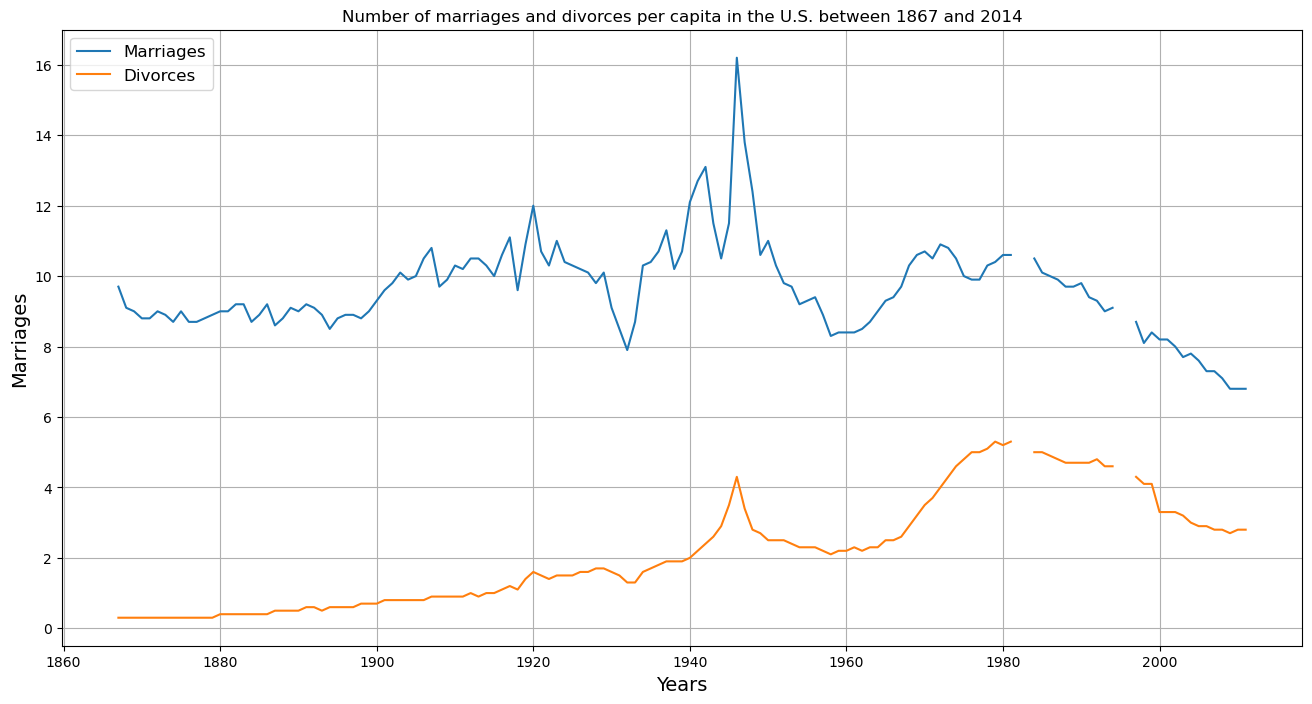

In [6]:
years = USMD['Year']
marriages = USMD['Marriages_per_1000']
divorces = USMD['Divorces_per_1000']
USMD = plt.figure(figsize=(16,8))
USMD = plt.plot(years, marriages, label='Marriages')
USMD = plt.plot(years, divorces, label='Divorces')
USMD = plt.title("Number of marriages and divorces per capita in the U.S. between 1867 and 2014")
USMD = plt.xlabel("Years",fontsize=14)
USMD = plt.legend(fontsize = 12, loc = "upper left")
USMD = plt.ylabel("Marriages",fontsize=14)
USMD = plt.grid(True)
USMD

Question 7

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
USMD = pd.read_csv('us-marriages-divorces-1867-2014.csv')
Avar = USMD.loc[USMD.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
Avar

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


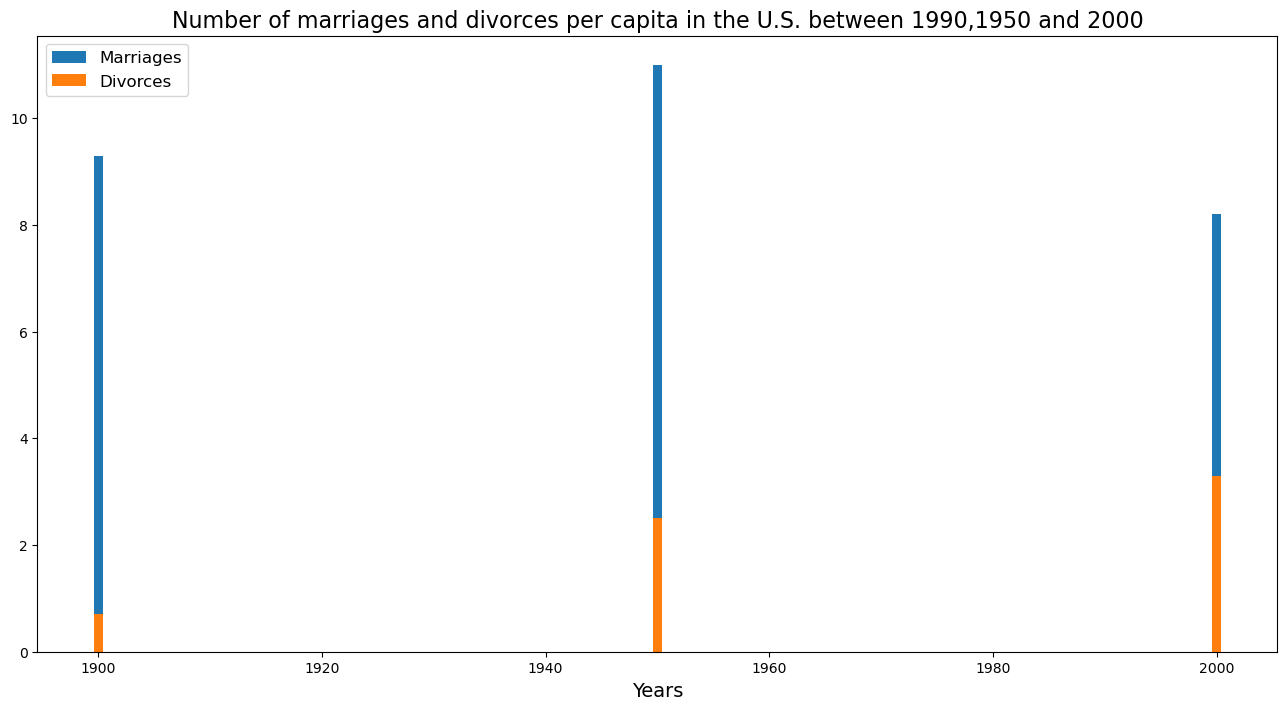

In [8]:
Avar = Avar[Avar['Year'].apply(lambda x: x in [1900, 1950, 2000])]
years = Avar['Year']
marriages = Avar['Marriages_per_1000']
divorces = Avar['Divorces_per_1000']
Avar = plt.figure(figsize= (16,8))
Avar = plt.bar(years, marriages, label ='Marriages')
Avar = plt.bar(years, divorces, label = 'Divorces')
Avar = plt.title("Number of marriages and divorces per capita in the U.S. between 1990,1950 and 2000", fontsize=16)
Avar = plt.xlabel("Years", fontsize=14)
Avar = plt.legend(fontsize = 12, loc = "upper left")
Avar

Question 8

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dead_actors = pd.read_csv('actor_kill_counts.csv')
dead_actors

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


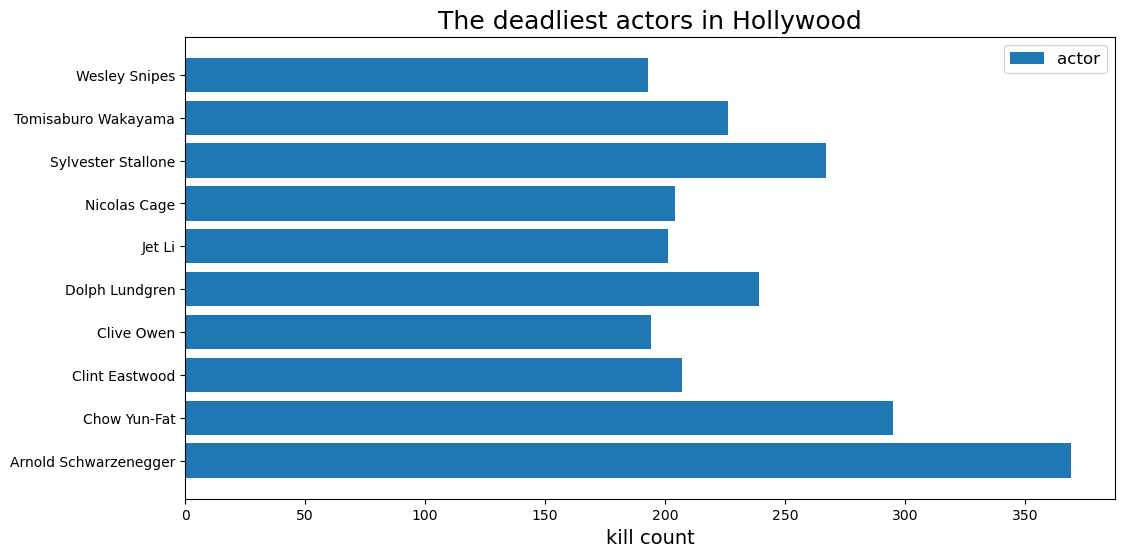

In [12]:
actors = dead_actors['Actor']
killCount = dead_actors['Count']
dead_actors = plt.figure(figsize=(12,6))
dead_actors = plt.barh(actors, killCount, label='actor')
#dead_actors = plt.barh(killCount, width=0.5, labe;='kill Count')
dead_actors = plt.title("The deadliest actors in Hollywood", fontsize=18)
dead_actors = plt.xlabel("kill count", fontsize=14)
dead_actors = plt.legend(fontsize = 12, loc = "upper right")
dead_actors

Question 9


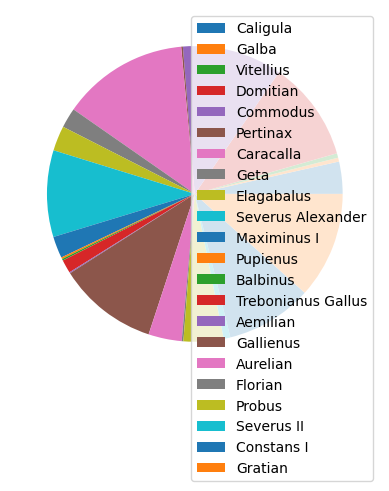

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("roman-emperor-reigns.csv")
data = data[data["Cause_of_Death"]=="Assassinated"]
patches, texts = plt.pie(data.Length_of_Reign)
plt.legend(data.Emperor)
plt.show()

Question 10

In [29]:
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

Text(0, 0.5, 'CS Doctorates Awarded')

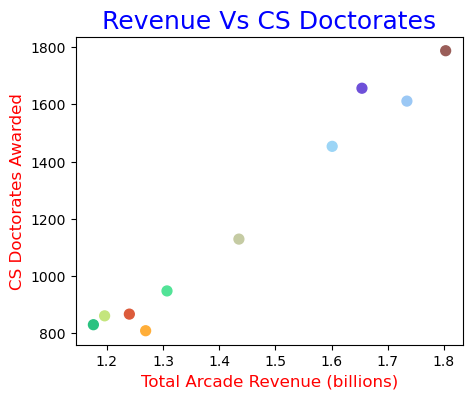

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
%matplotlib inline

colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

data.plot.scatter(x='Total Arcade Revenue (billions)',

y='Computer Science Doctorates Awarded (US)', c=colours , s = 50, figsize = (5,4))

plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Red', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Red', fontsize = 12)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
Scplot = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
Scplot


,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0, 0.5, 'CS Doctorates Awarded')

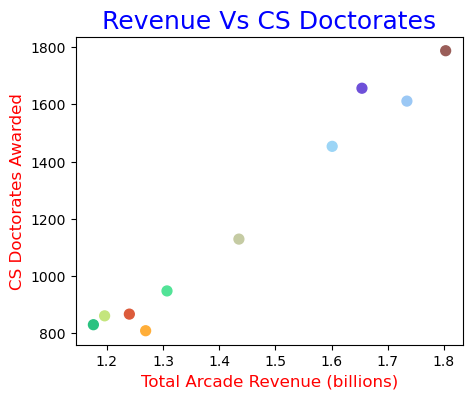

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

data.plot.scatter(x='Total Arcade Revenue (billions)',

y='Computer Science Doctorates Awarded (US)', c=colours , s = 50, figsize = (5,4))

plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Red', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Red', fontsize = 12)